<a href="https://colab.research.google.com/github/alirustama/Data-Analyst/blob/master/Video_frame_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm


In [ ]:
count = 0
videoFile = "test.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


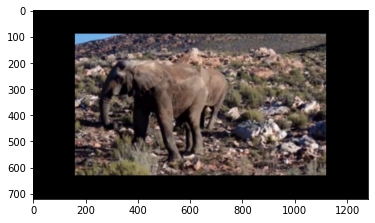

In [ ]:
img = plt.imread('frame103.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
count = 0
videoFile = "train.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


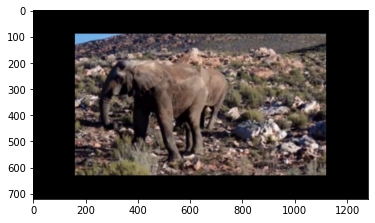

In [ ]:
img = plt.imread('frame103.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
data = pd.read_csv('test.csv')     # reading the csv file
data.head(10)  

,Frame_ID
0,Test_0.jpg
1,Test_1.jpg
2,Test_2.jpg
3,Test_3.jpg
4,Test_4.jpg
5,Test_5.jpg
6,Test_6.jpg
7,Test_7.jpg
8,Test_8.jpg
9,Test_9.jpg


In [ ]:
data = pd.read_csv('train.csv')     # reading the csv file
data.tail(20)      # printing first ten rows of the file

,Frame_ID,Animal
388,Frame_388.jpg,Unknown
389,Frame_389.jpg,Unknown
390,Frame_390.jpg,Unknown
391,Frame_391.jpg,Unknown
392,Frame_392.jpg,Unknown
393,Frame_393.jpg,Unknown
394,Frame_394.jpg,Unknown
395,Frame_395.jpg,Unknown
396,Frame_396.jpg,Unknown
397,Frame_397.jpg,Unknown


In [ ]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
import csv


with open('train.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Frame_ID', 'Animal']
['Frame_0.jpg', 'Parrot']
['Frame_1.jpg', 'Parrot']
['Frame_2.jpg', 'Parrot']
['Frame_3.jpg', 'Parrot']
['Frame_4.jpg', 'Parrot']
['Frame_5.jpg', 'Unknown']
['Frame_6.jpg', 'Unknown']
['Frame_7.jpg', 'Unknown']
['Frame_8.jpg', 'Unknown']
['Frame_9.jpg', 'Unknown']
['Frame_10.jpg', 'Unknown']
['Frame_11.jpg', 'Unknown']
['Frame_12.jpg', 'Unknown']
['Frame_13.jpg', 'Unknown']
['Frame_14.jpg', 'Unknown']
['Frame_15.jpg', 'Unknown']
['Frame_16.jpg', 'Unknown']
['Frame_17.jpg', 'Unknown']
['Frame_18.jpg', 'Unknown']
['Frame_19.jpg', 'Unknown']
['Frame_20.jpg', 'Unknown']
['Frame_21.jpg', 'Unknown']
['Frame_22.jpg', 'Unknown']
['Frame_23.jpg', 'Unknown']
['Frame_24.jpg', 'Unknown']
['Frame_25.jpg', 'Squirrel']
['Frame_26.jpg', 'Squirrel']
['Frame_27.jpg', 'Squirrel']
['Frame_28.jpg', 'Squirrel']
['Frame_29.jpg', 'Squirrel']
['Frame_30.jpg', 'Squirrel']
['Frame_31.jpg', 'Squirrel']
['Frame_32.jpg', 'Squirrel']
['Frame_33.jpg', 'Squirrel']
['Frame_34.jpg', 'Squirrel']
['

In [109]:
data = pd.read_csv('/content/sample_submission.csv')     # reading the csv file
data.head(20)      # printing first ten rows of the file

,Frame_ID,Animal
0,Frame_0.jpg,Parrot
1,Frame_1.jpg,Parrot
2,Frame_2.jpg,Parrot
3,Frame_3.jpg,Parrot
4,Frame_4.jpg,Parrot


In [124]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

train_df.sample(113)

Total videos for training: 408
Total videos for testing: 113


,Frame_ID,Animal
186,Frame_186.jpg,Pelican
401,Frame_401.jpg,Unknown
1,Frame_1.jpg,Parrot
325,Frame_325.jpg,Squirrel
264,Frame_264.jpg,Unknown
...,...,...
150,Frame_150.jpg,Pelican
77,Frame_77.jpg,Peacock
187,Frame_187.jpg,Pelican
101,Frame_101.jpg,Elephant


In [117]:

from tensorflow import keras
from imutils import paths

In [118]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(224,224)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [119]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(224, 224, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((224, 224, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

87924736/87910968 [==============================] - 1s 0us/step


In [121]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["Animal"])
)
print(label_processor.get_vocabulary())

['Bear', 'Deer', 'Duck', 'Elephant', 'Monkey', 'Parrot', 'Peacock', 'Pelican', 'Penguin', 'Squirrel', 'Tiger', 'Turtle', 'Unknown']


In [128]:
#create DataFrame

data.to_csv('/content/sample_submission.csv', sep='\t', index=False,header=True)



